In [2]:
import numpy as np
# use: conda install -c conda-forge matplotlib -y
# to install a new library
# matchTheBeat_

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [3]:
# define percepts (current location is NW corner and it is dirty)
bumper = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty1 = True

# call agent program function with percepts, and it returns an action
simple_randomized_agent(bumper, dirty1)

'north'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [4]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [5]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: west
step 1 - action: east
step 2 - action: suck
step 3 - action: east
step 4 - action: south
step 5 - action: north
step 6 - action: suck
step 7 - action: north
step 8 - action: west
step 9 - action: west
step 10 - action: south
step 11 - action: east
step 12 - action: east
step 13 - action: south
step 14 - action: south
step 15 - action: north
step 16 - action: suck
step 17 - action: west
step 18 - action: south
step 19 - action: suck


4

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [6]:
import random

class Tile: # Tile object, n*n will exist and will keep track of dif variables
    def __init__(self, position, dirty, object, robot):
        self.position = position
        self.dirty = dirty
        self.object = object
        self.hasRobot = robot


def environment(agent, max_steps, roomSize, verbose = True):
    num_cleaned = 0
    total_steps = 0
    total_dirty = 0
    room = []
    for i in range (0, roomSize*roomSize): # Creates the room and initializes all the dirty tiles
        dirt = np.random.choice([True, False], p=[0.2, 0.8])
        if dirt: total_dirty += 1
        room.append( Tile(i, dirt, False, False) )

    # initialize the agents position
    position = random.randint(0, roomSize*roomSize-1) # position is just a #, but can reference tile obj array
    room[position].hasRobot = True # update the room itself

    for i in range(max_steps):

        if total_dirty == 0: return total_steps # early breaking condition

        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
        if 0 <= position < roomSize: bumpers['north'] = True # update the bumper according to position
        if position%roomSize == 0: bumpers['west'] = True # complicated but it works trust me
        if position%roomSize - (roomSize-1) == 0: bumpers['east'] = True
        if ((roomSize*roomSize) - roomSize) <= position < roomSize*roomSize: bumpers['south'] = True

        action = agent(bumpers, room[position].dirty)
        if verbose: print("step", i, "- action:", action, "at position: ", position)

        # I forgot to check if the tile was actually dirty in the first place.
        #  Random was outperforming by so much. because it wasnt actually cleaning
        if action == "suck":
            if room[position].dirty:
                num_cleaned += 1
                total_dirty -= 1
                room[position].dirty = False

        if action == "north":
            if not bumpers['north']:
                room[position].hasRobot = False
                position -=roomSize # going 'up' means the index is changed by n in a 1D array
                room[position].hasRobot = True

        elif action == "east":
            if not bumpers['east']:
                room[position].hasRobot = False
                position +=1
                room[position].hasRobot = True

        elif action == "west":
            if not bumpers['west']:
                room[position].hasRobot = False
                position -=1
                room[position].hasRobot = True

        elif action == "south":
            if not bumpers['south']:
                room[position].hasRobot = False
                position +=roomSize
                room[position].hasRobot = True

        total_steps += 1

    return total_steps


## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [7]:
def reflex_agent(bumpers, dirty):
    if dirty: return "suck"
    # if any of the bump sensors are true, move in opposite direction
    elif bumpers["north"]: return "south"
    elif bumpers["east"]: return "west"
    elif bumpers["west"]: return "east"
    elif bumpers["south"]: return "north"

    # Ideally would want it to one direction, then straight line to another wall but that requires internal state
    actions_reflex = ["north", "east", "west", "south"]
    return np.random.choice(actions_reflex)

environment(reflex_agent, 10000, 6, False)

246

In [8]:
environment(simple_randomized_agent, 10000, 5, False)

355

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

The first implementation determines its location by going to the NE and SW corner of the room. It keeps track of how many tiles it crosses and after getting the length and width, is able to determine location. During and after orienting itself, the agent also keeps track of each position it has already visited in order to not visit it again.

The second agent has fewer internal states to keep track of, and just tries to clean the room in an up and down, left then right fashion. By keeping track of the direction it is heading, it can determine whether it should continue to go up or down. Keeping track of the total west movement also allows it to go east once the left side of the floor is cleaned.

In [9]:
class ModelReflexAgent:
    def __init__(self, name, position = 0):
        self.name = name
        self.position = position
        self.past_states = []
        self.xMoves = 0
        self.yMoves = 0
        self.xLength = 0
        self.yLength = 0
        self.orientated = False
        self.northOrient = False
        self.westOrient = False
        self.direction = 'N'

    def act(self, bumpers, dirty):
        if not self.orientated: # hate that you have to type not instead of !
            if dirty: return "suck"
            if not bumpers["north"] and not self.northOrient: # goes north until it hits wall
                self.yMoves += 1
                return "north"
            self.northOrient = True
            if not bumpers["west"] and not self.westOrient: # goes east until it hits wall
                self.xMoves+=1
                return "west"
            # the agent should be in NW corner now
            if not self.westOrient:
                for i in range(0,self.xMoves+1): self.past_states.append(i) #add moves needed to get to corner
            self.westOrient = True
            if not bumpers["south"]: # if hasn't reached SW corner
                self.yLength += 1
                return "south"
            if not bumpers["east"]: # if hasnt reached SE corner
                self.xLength +=1
                return "east"
            # the agent has reached SE corner
            self.yLength += 1 # needed to make it accurate
            self.xLength += 1
            for i in range(0,self.yMoves+1): self.past_states.append((i * self.xLength) + self.xMoves)
            for i in range(1,self.yLength): self.past_states.append(i * self.yLength)
            for i in range(self.yLength * self.xLength - self.xLength + 1, self.yLength * self.xLength):
                self.past_states.append(i)
            # print(self.past_states) # usefull for debugging
            self.position = self.yLength * self.xLength - 1 - self.xLength
            self.orientated = True
            return "north"
        else:
            if dirty: return "suck"
            if self.direction == 'N':
                # checks if a move N has been done before and is not hitting a wall
                if self.position - self.xLength not in self.past_states and not bumpers['north'] :
                    self.position -= self.xLength
                    self.past_states.append(self.position)
                    return "north"
                else:
                    self.position -= 1
                    self.direction = 'W'
                    self.past_states.append(self.position)
                    return "west"
            if self.direction == 'W':
                # checks if a move S has been done
                if self.position + self.xLength in self.past_states and not bumpers['west']:
                    self.position -= 1 # moves one farther W
                    self.past_states.append(self.position)
                    return "west"
                elif self.position - self.xLength not in self.past_states and not bumpers['north']:
                    self.position -= self.xLength
                    self.direction = 'N'
                    self.past_states.append(self.position)
                    return "north"
                elif self.position + self.xLength not in self.past_states and not bumpers['south']:
                    self.position += self.xLength
                    self.direction = 'S'
                    self.past_states.append(self.position)
                    return "south"
                else:
                    self.position += 1
                    self.direction = 'E'
                    self.past_states.append(self.position)
                    return "east"

            if self.direction == 'S':
                # checks if a move S has been done
                if self.position + self.xLength not in self.past_states and not bumpers['south']:
                    self.position += self.xLength
                    self.past_states.append(self.position)
                    return "south"
                else:
                    self.position -= 1
                    self.direction = 'W'
                    self.past_states.append(self.position)
                    return "west"
            if self.direction == 'E':
                if self.position + self.xLength not in self.past_states and not bumpers['south']:
                    self.position += self.xLength
                    self.past_states.append(self.position)
                    return "south"
                if self.position - self.xLength not in self.past_states and not bumpers['north']:
                    self.position -= self.xLength
                    self.past_states.append(self.position)
                    return "north"
                else:
                    self.position += 1
                    self.direction = 'E'
                    self.past_states.append(self.position)
                    return "east"

In [10]:
# I made this entire other agent because I thought random was outperforming my agent. It wasn't and my enviroment
# was wrong. But at least this one is simpler and performs well
class ModelReflexAgent2:
    def __init__(self, name, position = 0):
        self.name = name
        self.xMoves = 0
        self.step = False
        self.direction = 'N'

    def act(self, bumpers, dirty):
        if dirty : return "suck"

        if not bumpers["north"] and self.direction =='N':
            return "north"
        elif not bumpers["south"] and self.direction =='S':
            return "south"
        elif bumpers["north"] and self.direction =='N' and not bumpers["west"] and self.xMoves != -1:
            self.direction = 'W'
            self.xMoves += 1
            return "west"
        elif bumpers["south"] and self.direction =='S' and not bumpers["west"] and self.xMoves != -1:
            self.direction = 'W'
            self.xMoves += 1
            return "west"
        elif bumpers["south"] and self.direction =='S' and self.xMoves == -1:# only happen after all west tiles
            self.direction = 'N'
            return "east"
        elif bumpers["north"] and self.direction =='N' and self.xMoves == -1: # happens only after has gone west
            self.direction = 'S'
            return "east"
        elif self.direction == 'W':
            if bumpers["north"]:
                self.direction = 'S'
                return "south"
            elif bumpers["south"]:
                self.direction = 'N'
                return "north"
        elif bumpers["west"] or self.direction == 'E':
            self.direction = 'E'
            if self.xMoves != -1: # has to go over all the moves + 1 to get to new area
                self.xMoves -= 1
                return "east"
            else:
                if bumpers["north"]:
                    self.direction = 'S'
                    return "south"
                elif bumpers["south"]:
                    self.direction = 'N'
                    return "north"


In [11]:
agent1 = ModelReflexAgent("Agent1")
environment(agent1.act,1000, 10, False)

1000

In [18]:
agent2 = ModelReflexAgent2("Agent2")
environment(agent2.act,10000, 10, False)

112

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [133]:
stepCount = 10000

fiveResRandom = [environment(simple_randomized_agent, stepCount, 5, False) for i in range(0,100)]
tenResRandom = [environment(simple_randomized_agent, stepCount, 10, False) for i in range(0,100)]
hunnaResRandom = [environment(simple_randomized_agent, stepCount, 100, False) for i in range(0,100)]

fiveResReflex = [environment(reflex_agent, stepCount, 5, False) for i in range(0,100)]
tenResRelfex = [environment(reflex_agent, stepCount, 10, False) for i in range(0,100)]
hunnaResReflex = [environment(reflex_agent, stepCount, 100, False) for i in range(0,100)]

fiveResAgent1 = [environment(agent1.act, stepCount, 5, False) for i in range(0,100)]
tenResAgent1  = [environment(agent1.act, stepCount, 10, False) for i in range(0,100)]
hunnaResAgent1  = [environment(agent1.act, stepCount, 100, False) for i in range(0,100)]

fiveResAgent2 = [environment(agent2.act, stepCount, 5, False) for i in range(0,100)]
tenResAgent2  = [environment(agent2.act, stepCount, 10, False) for i in range(0,100)]
hunnaResAgent2  = [environment(agent2.act, stepCount, 100, False) for i in range(0,100)]

KeyboardInterrupt: 

In [31]:
hunnaResAgent1 = [environment(agent2.act, 10000, 10, False) for i in range(0,20)]
hunnaResAgent1

[10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 105,
 10000]

In [25]:
environment(agent1.act, 10000, 20, False)

10000

In [132]:
print("Average moves for 5x5 random: ",np.mean(fiveResRandom))
print("Average moves for 5x5 reflex: ",np.mean(fiveResReflex))
print("Average moves for 5x5 model1: ",np.mean(fiveResAgent1))
print("Average moves for 5x5 model2: ",np.mean(fiveResAgent2))

print("Average moves for 10x10 random: ",np.mean(tenResRandom))
print("Average moves for 10x10 reflex: ",np.mean(tenResRelfex)) # oops
print("Average moves for 10x10 model1: ",np.mean(tenResAgent1))
print("Average moves for 10x10 model2: ",np.mean(tenResAgent2))

print("Average moves for 100x100 random: ",np.mean(hunnaResRandom))
print("Average moves for 100x100 reflex: ",np.mean(hunnaResReflex))
print("Average moves for 100x100 model1: ",np.mean(hunnaResAgent1))
print("Average moves for 100x100 model2: ",np.mean(hunnaResAgent2))

Average moves for 5x5 random:  434.3
Average moves for 5x5 reflex:  955.92
Average moves for 5x5 model1:  1149.36
Average moves for 5x5 model2:  1248.98
Average moves for 10x10 random:  3177.72
Average moves for 10x10 reflex:  1011.21
Average moves for 10x10 model1:  1448.59
Average moves for 10x10 model2:  1348.72
Average moves for 100x100 random:  1448.59
Average moves for 100x100 reflex:  1448.59
Average moves for 100x100 model1:  1348.72
Average moves for 100x100 model2:  1348.72


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 0.5              | 1.81                | 2.42                     |
| 10x10   | 0.6              | 2.05                | 3.22                     |
| 100x100 | 0.54             | 2.3                 | 3.42                     |

Add charts to compare the performance of the different agents.

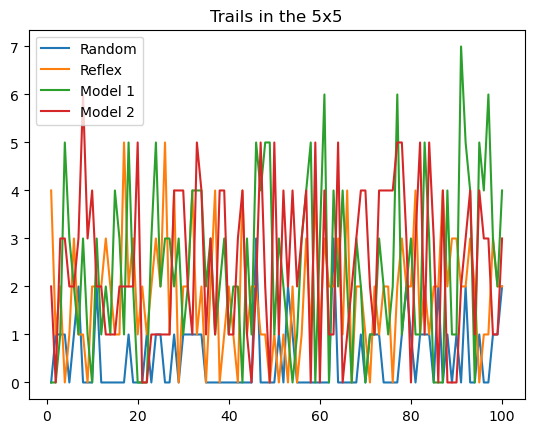

<Figure size 300x1000 with 0 Axes>

In [149]:
import matplotlib.pyplot as plt
base = np.arange(1, 101, dtype = np.uint32 )

plt.plot(base, fiveResRandom, label = "Random")
plt.plot(base, fiveResReflex, label = "Reflex")
plt.plot(base, fiveResAgent1, label = "Model 1")
plt.plot(base, fiveResAgent2, label = "Model 2")
plt.legend()
plt.title("Trails in the 5x5")
plt.figure(figsize=(3, 10))
plt.show()

# This is an awful chart. I'm sorry you have to look at it. However, it does show the huge variance in each run and the performance of each model.
# I will not plot each size but its still kinda cool to see

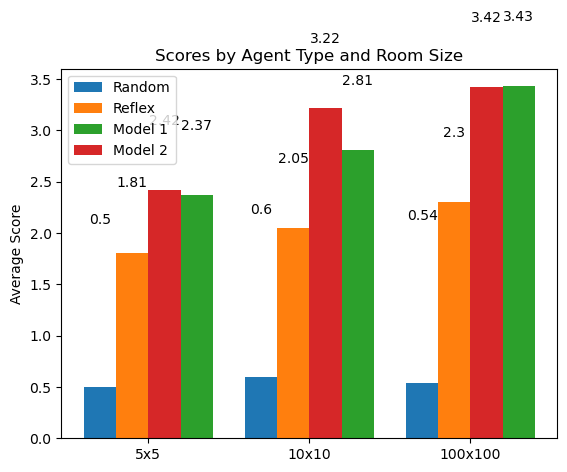

In [144]:
labels = ['5x5', '10x10', '100x100']
rand_means = [0.5, 0.6, 0.54]
reflex_means = [1.81, 2.05, 2.3]
model1_means = [2.37,2.81,3.43]
model2_means = [2.42,3.22,3.42]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.5, rand_means, width, label='Random')
rects2 = ax.bar(x - width/2, reflex_means, width, label='Reflex')
rects3 = ax.bar(x + width*1.5, model1_means, width, label='Model 1')
rects4 = ax.bar(x + width/2, model2_means, width, label='Model 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Score')
ax.set_title('Scores by Agent Type and Room Size')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=115)
ax.bar_label(rects2, padding=45)
ax.bar_label(rects3, padding=45)
ax.bar_label(rects4, padding=45)

plt.show()

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

The agents already operate in a room of unknown size, so performance will be the same regardless.
However, agent 1 determines the size of the room while it is orienting itself, so regardless of the rooms size it will be able to determine its location accurately. Thus, a room of irregular size will still not inhibit it.

If the room were to contain obstacles both programs would mistake these objects as walls. If these objects were on the perimeter for agent 1, the agent would mistake the size of the room and incorrectly determine location + visited squares.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In [98]:
# Adding objects to the environment should be simple, as the tile object already keeps track of it.
# The Tile should have an object on it in a similar manner to it being dirty but have the chance be much smaller

def environmentWithObjects(agent, max_steps, roomSize, verbose = True):
    num_cleaned = 0
    total_dirty = 0
    room = []
    for i in range (0, roomSize*roomSize): # Creates the room and initializes all the dirty tiles
        dirt = False
        if random.randint(0,100) < 20:
            dirt = True
            total_dirty += 1
        room.append( Tile(i, dirt, False, False) )
        if random.randint(0,100) <= 5: # this simple addition should add objects to the floor occasionally
            room[i].object = True

    # initialize the agents position
    position = random.randint(0, roomSize*roomSize-1)
    room[position].hasRobot = True # Technically the robot can spawn inside an object. Whatever tho

    for i in range(max_steps):
        walls = False
        if total_dirty == 0: return num_cleaned # early breaking condition

        # determines if the position is against a wall, check for the walls first to make sure not out of bounds
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        if 0 <= position < roomSize: bumpers['north'] = True # update the bumper according to position
        if position%roomSize == 0:bumpers['west'] = True # complicated but it works trust me
        if position%roomSize - (roomSize-1) == 0: bumpers['east'] = True
        if ((roomSize*roomSize) - roomSize) <= position < roomSize*roomSize: bumpers['south'] = True

        if not bumpers["west"]: # have to do this or else out-of-bounds errors thrown
            if room[position-1].object: bumpers['west'] = True

        if not bumpers["east"]:
            if room[position+1].object: bumpers['east'] = True

        if not bumpers["south"]:
            if room[position+roomSize].object: bumpers['south'] = True

        if not bumpers["north"]:
            if room[position-roomSize].object: bumpers['north'] = True


        action = agent(bumpers, room[position].dirty)
        if verbose: print("step", i, "- action:", action, "at position: ", position)

        # I forgot to check if the tile was actually dirty in the first place.
        #  Random was outperforming by so much. because it wasnt actually cleaning
        if action == "suck":
            if room[position].dirty:
                num_cleaned += 1
                total_dirty -= 1
                room[position].dirty = False

        if action == "north":
            if not bumpers['north']:
                room[position].hasRobot = False
                position -=roomSize # going 'up' means the index is changed by n in a 1D array
                room[position].hasRobot = True

        elif action == "east":
            if not bumpers['east']:
                room[position].hasRobot = False
                position +=1
                room[position].hasRobot = True

        elif action == "west":
            if not bumpers['west']:
                room[position].hasRobot = False
                position -=1
                room[position].hasRobot = True

        elif action == "south":
            if not bumpers['south']:
                room[position].hasRobot = False
                position +=roomSize
                room[position].hasRobot = True

    return num_cleaned


In [117]:
environmentWithObjects(agent1.act, 20, 5, True)

step 0 - action: suck at position:  13
step 1 - action: south at position:  13
step 2 - action: south at position:  18
step 3 - action: east at position:  23
step 4 - action: north at position:  24
step 5 - action: north at position:  19
step 6 - action: north at position:  14
step 7 - action: north at position:  9
step 8 - action: east at position:  4
step 9 - action: east at position:  4
step 10 - action: east at position:  4
step 11 - action: east at position:  4
step 12 - action: east at position:  4
step 13 - action: east at position:  4
step 14 - action: south at position:  4
step 15 - action: south at position:  9
step 16 - action: south at position:  14
step 17 - action: south at position:  19
step 18 - action: east at position:  24
step 19 - action: north at position:  24


1

In [105]:
fiveResModel_wOBJ = np.arange(0, 100, dtype = np.uint32 )
tenResModel_wOBJ = np.arange(0, 100, dtype = np.uint32 )
hunnaResModel_wOBJ = np.arange(0, 100, dtype = np.uint32 )

fiveResModel2_wOBJ = np.arange(0, 100, dtype = np.uint32 )
tenResModel2_wOBJ = np.arange(0, 100, dtype = np.uint32 )
hunnaResModel2_wOBJ = np.arange(0, 100, dtype = np.uint32 )

for i in range(0,100):
    fiveResModel_wOBJ[i] = (environmentWithObjects(agent1.act, stepCount, 5, False))
    tenResModel_wOBJ[i] = (environmentWithObjects(agent1.act, stepCount, 10, False))
    hunnaResModel_wOBJ[i] = (environmentWithObjects(agent1.act, stepCount, 100, False))

    # the second agent outperforms the first one
    fiveResModel2_wOBJ[i] = (environmentWithObjects(agent2.act, stepCount, 5, False))
    tenResModel2_wOBJ[i] = (environmentWithObjects(agent2.act, stepCount, 10, False))
    hunnaResModel2_wOBJ[i] = (environmentWithObjects(agent2.act, stepCount, 100, False))

print("average for agent 1 size 5 with objects: ", np.mean(fiveResModel_wOBJ))
print("average for agent 2 size 5 with objects: ",np.mean(fiveResModel2_wOBJ))
print("average for agent 1 size 10 with objects: ",np.mean(tenResModel_wOBJ))
print("average for agent 2 size 10 with objects: ",np.mean(tenResModel2_wOBJ))
print("average for agent 1 size 100 with objects: ",np.mean(hunnaResModel_wOBJ))
print("average for agent 2 size 100 with objects: ",np.mean(hunnaResModel2_wOBJ))

average for agent 1 size 5 with objects:  2.01
average for agent 2 size 5 with objects:  1.72
average for agent 1 size 10 with objects:  2.41
average for agent 2 size 10 with objects:  3.18
average for agent 1 size 100 with objects:  3.13
average for agent 2 size 100 with objects:  3.32


Surprisingly both agents perform well in the obstacle environment despite clear bugs in the code. When analyzing the first agent with orientation, it seems that the agent will detect the object but incorrectly label it as a boundary for the room.

To improve model 1, during orientation if a bumper is activated it should try to circle around and determine if it's a wall or an object. After going 3 places further if a gap in the object is not found, then it should continue forward as the program currently is. This way, the dimensions of the room are found and the agent will be able to tell in the future if an object it runs into is a wall or not. If one of these objects are found, the agent should mark the location as visited, and try to circle around it.

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [13]:
# Your ideas/code